# Data Science Project: Planning Stage (Individual)

**Name:** Shu Shang   
**Course:** DSCI_V 100 003 2025W1 
**Project Topic:** Minecraft Research Server Usage  
**Date:** November 2025


In [5]:
library(tidyverse)
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
head(players)


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [7]:
head(sessions)


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## (1) Data Description

### Dataset Overview

The project uses two datasets, **players.csv** and **sessions.csv**.  
- `players.csv` is information about each unique player, such as experience level, gender, and total play hours.  
- `sessions.csv` is information about individual game sessions, including session start and end times.

These datasets come from real player activity on the server. Each player has a unique ID made from their email (hashed for privacy). The data were collected automatically from game logs, which helps avoid bias from self-reports. However, some entries might be missing or broken because of server or network issues.

---

### Variables Summary

| Variable | Dataset | Type | Description | Potential Issues |
|-----------|----------|------|--------------|------------------|
| experience | players.csv | categorical | Player experience level (Amateur, Veteran, Pro) | Uneven category counts |
| subscribe | players.csv | logical | Player subscribed to newsletter (TRUE/FALSE) | Binary variable |
| hashedEmail | both | categorical | Unique player identifier (join key) | None |
| played_hours | players.csv | numeric | Total hours spent in game | Possible outliers or zeros |
| name | players.csv | text | In-game name | Not used for analysis |
| gender | players.csv | categorical | Player gender | May be unbalanced |
| Age | players.csv | numeric | Player age | Possible unrealistic values |
| start_time | sessions.csv | datetime | Session start time | Needs format conversion |
| end_time | sessions.csv | datetime | Session end time | Needs format conversion |
| original_start_time | sessions.csv | numeric | Start time in UNIX timestamp | Duplicated format |
| original_end_time | sessions.csv | numeric | End time in UNIX timestamp | Duplicated format |

---

### Data Overview Summary
- **players.csv:** 196 observations, 7 variables  
- **sessions.csv:** 1535 observations, 5 variables  
- Each player appears once in `players.csv` but multiple times in `sessions.csv`.  
- Main data issues: missing values, duplicated time formats, and outliers in `played_hours`.


## (2) Questions

### Broad Question
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question
Can a player’s **total play hours**, **experience level** **age** predict whether they **subscribe** to the newsletter?

### Explanation
To fix this question, I will:
- Use data from both `players.csv` and `sessions.csv`.
- Join the two datasets using the `hashedEmail` column.
- From `sessions.csv`, calculate **total session duration per player** and merge it with `players.csv`.
- Use `subscribe` as the **response variable** (TRUE/FALSE), and the following as **predictors**:
  - `played_hours` 
  - `experience` 
  - `Age` 
- Later, I plan to use a K-Nearest Neighbors (KNN) classification to determine which features are most associated with subscribing behaviour.

This question helps the research team find out which players are most active in the game community. Then they can better choose who to invite and send newsletters to.


## (3) Exploratory Data Analysis and Visualization
### Added summary and plots for player data

In [8]:
players %>%
  summarise_if(is.numeric, mean, na.rm = TRUE)


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


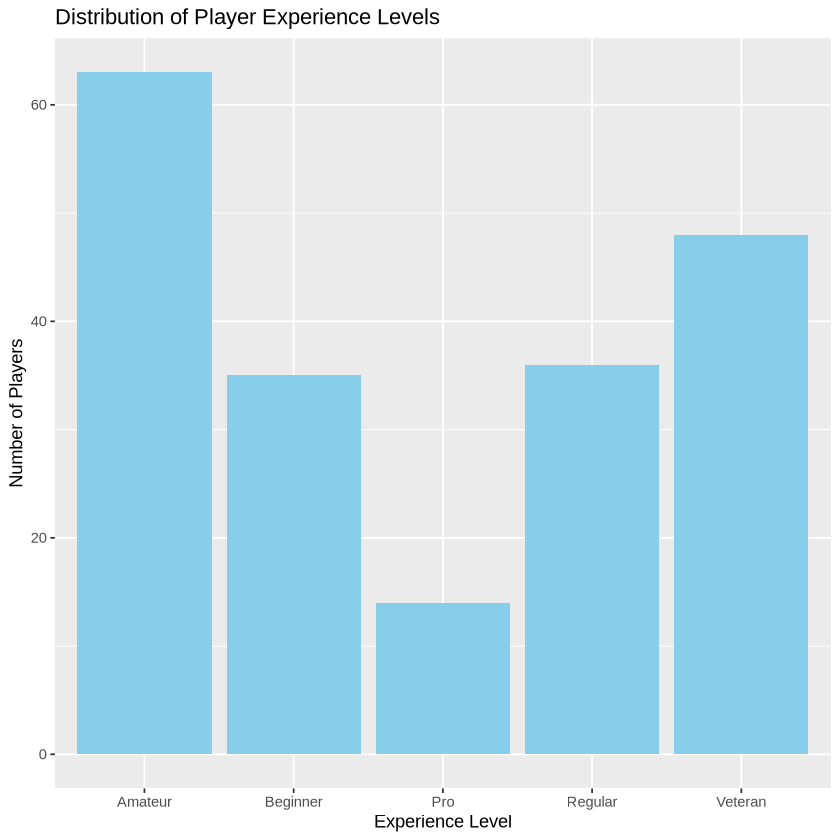

In [9]:
ggplot(players, aes(x = experience)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Distribution of Player Experience Levels",
       x = "Experience Level",
       y = "Number of Players")


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


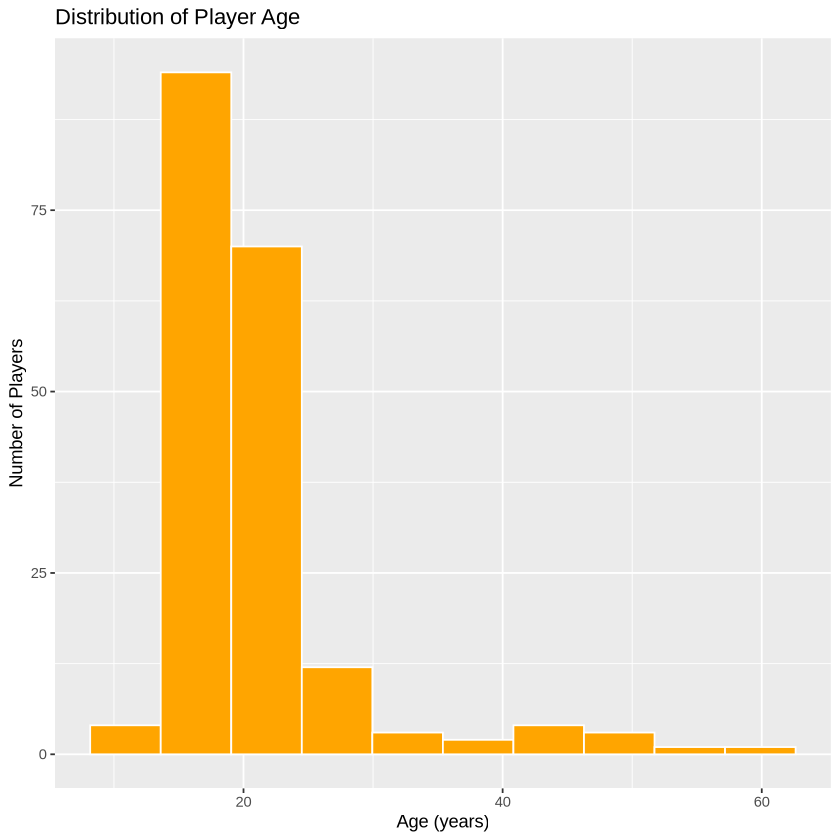

In [10]:
ggplot(players, aes(x = Age)) +
  geom_histogram(bins = 10, fill = "orange", color = "white") +
  labs(title = "Distribution of Player Age",
       x = "Age (years)",
       y = "Number of Players")


### Insights

From the summary table:
- Players play an average of 5.85 hours, and their average age is about 21.
- This means most players are pretty young and play a moderate amount.
- A few players have zero play hours. I think it might mean they’re inactive or the data didn’t record right.

From the visualizations:
- Most players are Amateurs or Veterans, with fewer Pros and Beginners.
- The age chart is right-skewed. Most players are under 25, and a few older ones stand out as outliers.
- Overall, younger and mid-level players make up most of the community. That could explain why they’re more interested in game news or updates.

Potential issues:
- Missing or incorrect ages (2 rows removed during plotting).
- The experience levels aren’t balanced. That might affect future model results.
- A few players have very low or very high play hours, so checking those before modeling.
- Numeric variables need to be standardized before KNN.

## (4) Methods and Plan

I’ll use a **K-Nearest Neighbors (KNN) classification** model to predict whether a player subscribes to the newsletter. I'll using their age, total play hours, and experience level as inputs.

This method is applicable because the variable (`subscribe`) is a binary variable, and the predictor variables describe measurable player characteristics. KNN can uncover patterns between them even though the relationships between players are nonlinear.

The main assumption: players with similar features tend to act in similar ways, and all numeric features need to be normalized so each one has the same impact.

Potential limitations: Easily affected by outliers, unbalanced classes, and slow performance on large datasets. The model’s accuracy also depends on the chosen value of *k*.

I will combine players.csv and sessions.csv using hashedEmail, add each player’s total play time, and keep only useful variables. Categorical data will be turned into numbers, and numeric values will be scaled. I will split the data into 70% training and 30% testing, with cross-validation used to find the best k. Model performance will be checked using accuracy and a confusion matrix. No predictions will be made yet.


## (5) GitHub Repository

My GitHub repository for this project:  
https://github.com/Mickey-S-dsci/dsci100_minecraft_planning_shushang

Includes my notebook, HTML report, and dataset files.  
There are at least five commits showing different stages of progress.
